Objective

This notebook performs a comprehensive Exploratory Data Analysis (EDA) on the Brazilian E-Commerce dataset. The goal is to uncover key insights into:

Customer behavior

Seller performance

Product dynamics

Delivery logistics

Dataset Overview

The Brazilian E-Commerce Public Dataset by Olist contains detailed records of orders made at a multi-vendor marketplace in Brazil from 2016 to 2018. It includes data across:

Orders

Customers

Sellers

Order items

Products

Payments

Reviews

Geolocation

Product category translations

Data Analysis Workflow

Data Retrieval - Load and inspect the datasets provided.

Initial Exploration - Understand the structure, shape, and basic contents of the data.

Data Cleaning - Handle missing values, data types, duplicates, and inconsistencies.

Data Wrangling - Merge, transform, and engineer features across multiple tables.
Exploratory Data Analysis (EDA) - Dive deep into the dataset to explore trends, distributions, and relationships

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)

In [2]:
#Downloading the dataset from the Kaggle API
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Path to dataset files: /kaggle/input/brazilian-ecommerce


In [3]:
import os
import pandas as pd

# The 'path' variable from the previous cell contains the directory of the downloaded dataset
print("Files in the dataset directory:")
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Example: Load one of the CSV files into a pandas DataFrame
# Replace 'your_csv_file.csv' with the actual name of a CSV file from the output above
# You might need to adjust the path if the CSV is in a subdirectory
csv_file_path = os.path.join(path, 'olist_sellers_dataset.csv') # Example file name
try:
    olist_sellers = pd.read_csv(csv_file_path)
    print("\nSuccessfully loaded", csv_file_path, "into a DataFrame.")
    display(olist_sellers.head()) # Display the first 5 rows of the DataFrame
except FileNotFoundError:
    print(f"\nError: {csv_file_path} not found. Please check the filenames listed above and update the csv_file_path variable.")
except Exception as e:
    print(f"\nAn error occurred while reading the CSV file: {e}")

Files in the dataset directory:
/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv

Successfully loaded /kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv into a DataFrame.


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [4]:
#defining file paths

list_customers_dataset = '/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv'
list_sellers_dataset= '/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv'
olist_order_reviews_dataset= '/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv'
olist_order_items_dataset= '/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv'
olist_products_dataset= '/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv'
olist_geolocation_dataset= '/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv'
product_category_name_translation= '/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv'
olist_orders_dataset= '/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv'
olist_order_payments_dataset= '/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv'



In [5]:
#Loading Datasets

customer= pd.read_csv(list_customers_dataset)
order_reviews= pd.read_csv(olist_order_reviews_dataset)
order_items= pd.read_csv(olist_order_items_dataset)
products= pd.read_csv(olist_products_dataset)
geolocation= pd.read_csv(olist_geolocation_dataset)
product_category= pd.read_csv(product_category_name_translation)
orders= pd.read_csv(olist_orders_dataset)
order_payment= pd.read_csv(olist_order_payments_dataset)
sellers= pd.read_csv(list_sellers_dataset)
geolocation= pd.read_csv(olist_geolocation_dataset)

Customers Dataset

This dataset contains information about each unique customer, including their location (city, state, ZIP prefix) and an anonymized ID that links to the orders dataset

In [6]:
customer.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
customer.customer_unique_id.nunique()


96096

In [9]:
customer.customer_id.nunique()

99441

Observations

No missing values detected.

Each row represents a unique customer.

Orders Dataset

This dataset contains the core information about each order, including its status, purchase time, delivery estimates, and timestamps for various stages in the order lifecycle. It serves as the central dataset that connects to several others:

customers via customer_id
order_items,   order_reviews,   and order_payments via order_id

In [10]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
orders.order_status.value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


Observations

The dataset contains 8 unique values in order_status,
including:
delivered
shipped
canceled
processing
invoiced,
unavailable, etc.

Some orders were never delivered or even shipped.

order_id is the primary key and links to:

order_items, order_payments, order_reviews, and customers

The timestamp fields are currently stored as object types:

order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, etc.

These will need to be converted to datetime for proper analysis.
order_estimated_delivery_date only includes the day of date (not time).

Order_items Dataset

In [13]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
order_items.nunique()  #no if unique values in each colunms

,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999


Order_payment dataset

In [16]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [17]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
order_payment.payment_type.value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [19]:
order_payment.payment_sequential.unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [20]:
order_payment['payment_value'].describe()

,payment_value
count,103886.000000
mean,154.100380
std,217.494064
min,0.000000
25%,56.790000
50%,100.000000
75%,171.837500
max,13664.080000


Orders review dataset


In [21]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [22]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [23]:
order_reviews.review_score.value_counts()

,count
review_score,
5,57328
4,19142
1,11424
3,8179
2,3151


Products Dataset

In [24]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [25]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
products.product_category_name.nunique()

73

In [27]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Sellers dataset

In [28]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [29]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [30]:
sellers.describe(include='object')

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,9e25199f6ef7e7c347120ff175652c3b,sao paulo,SP
freq,1,694,1849


Geolocation Dataset

In [31]:
geolocation.shape

(1000163, 5)

In [32]:
geolocation= geolocation.groupby('geolocation_zip_code_prefix').agg(
                                                       {'geolocation_lat':'mean',
                                                        'geolocation_lng': 'mean',
                                                        'geolocation_city': 'first',
                                                        'geolocation_state': 'last'
                                                        }

)

In [33]:
geolocation.head()

,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
geolocation_zip_code_prefix,,,,
1001,-23.550190,-46.634024,sao paulo,SP
1002,-23.548146,-46.634979,sao paulo,SP
1003,-23.548994,-46.635731,sao paulo,SP
1004,-23.549799,-46.634757,sao paulo,SP
1005,-23.549456,-46.636733,sao paulo,SP


Data cleaning

drop , fill or impute missing values

convert string to datetime

normalising data for ex Male,male -: Male or M

removing duplicate rows

---



In [34]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [35]:
cols = list(orders.columns[3:])

In [36]:
for col in cols:
  orders[col]= pd.to_datetime(orders[col],errors='coerce')

In [37]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [38]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [39]:
mask_invalid_orders= (
(orders['order_approved_at']< orders['order_purchase_timestamp'])|
(orders['order_delivered_carrier_date']< orders['order_approved_at'])|
(orders['order_delivered_customer_date']< orders['order_delivered_carrier_date'])|
(orders['order_estimated_delivery_date']< orders['order_delivered_customer_date'])
)

In [40]:
invalid_orders= orders.loc[mask_invalid_orders,:]

In [41]:
invalid_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9176 entries, 15 to 99432
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       9176 non-null   object        
 1   customer_id                    9176 non-null   object        
 2   order_status                   9176 non-null   object        
 3   order_purchase_timestamp       9176 non-null   datetime64[ns]
 4   order_approved_at              9176 non-null   datetime64[ns]
 5   order_delivered_carrier_date   9175 non-null   datetime64[ns]
 6   order_delivered_customer_date  9167 non-null   datetime64[ns]
 7   order_estimated_delivery_date  9176 non-null   datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 645.2+ KB


In [42]:
orders= orders.drop(invalid_orders.index).reset_index(drop=True)

In [43]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90265 entries, 0 to 90264
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       90265 non-null  object        
 1   customer_id                    90265 non-null  object        
 2   order_status                   90265 non-null  object        
 3   order_purchase_timestamp       90265 non-null  datetime64[ns]
 4   order_approved_at              90105 non-null  datetime64[ns]
 5   order_delivered_carrier_date   88483 non-null  datetime64[ns]
 6   order_delivered_customer_date  87309 non-null  datetime64[ns]
 7   order_estimated_delivery_date  90265 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 5.5+ MB


In [44]:
order_items.shape[0]

112650

In [45]:
mask_price= (order_items['price']>0 ) & (order_items['freight_value']>=0) #filtering the data where price >0

In [46]:
order_items= order_items.loc[mask_price,:]

In [47]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.9+ MB


In [48]:
order_items.rename(columns={'shipping_limit_date': 'shipping_deadline'},inplace=True)

In [49]:
order_payment.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [50]:
order_payment['payment_type']= order_payment['payment_type'].str.replace('boleto','bank_slip') #replacing boleto with bank slip for better understanding


In [51]:
order_payment['payment_type'].value_counts()

,count
payment_type,
credit_card,76795
bank_slip,19784
voucher,5775
debit_card,1529
not_defined,3


In [52]:
order_payment= order_payment[~(order_payment['payment_type']=='not_defined')] #removing all the rows where payment type is not defined

In [53]:
order_payment['payment_type'].value_counts()

,count
payment_type,
credit_card,76795
bank_slip,19784
voucher,5775
debit_card,1529


In [54]:
df= order_payment[~(order_payment['payment_type']=='not_defined')]

In [55]:
order_payment.shape

(103883, 5)

In [56]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [57]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [58]:
#conveting string columns into date timestamp
order_reviews['review_creation_date']= pd.to_datetime(order_reviews['review_creation_date'],errors='coerce')
order_reviews['review_answer_timestamp']= pd.to_datetime(order_reviews['review_answer_timestamp'],errors='coerce')

In [59]:
order_reviews['review_comment_message'].isna().sum()

np.int64(58247)

In [60]:
order_reviews[order_reviews['order_id'].duplicated()].sort_values(by='order_id')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
25612,89a02c45c340aeeb1354a24e7d4b2c1e,0035246a40f520710769010f752e7507,5,NaN,NaN,2017-08-29,2017-08-30 01:59:12
68633,73413b847f63e02bc752b364f6d05ee9,013056cfe49763c6f66bda03396c5ee3,4,NaN,NaN,2018-03-04,2018-03-05 17:02:00
83224,d8e8c42271c8fb67b9dad95d98c8ff80,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30,2018-01-02 10:54:47
89888,0c8e7347f1cdd2aede37371543e3d163,02355020fd0a40a0d56df9f6ff060413,3,NaN,UM DOS PRODUTOS (ENTREGA02) COMPRADOS NESTE PE...,2018-03-21,2018-03-22 01:32:08
55137,61fe4e7d1ae801bbe169eb67b86c6eda,029863af4b968de1e5d6a82782e662f5,4,NaN,NaN,2017-07-19,2017-07-20 12:06:11
...,...,...,...,...,...,...,...
80631,c509f8b367ee5227700c29fcc76a097a,fd95ae805c63c534f1a64589e102225e,5,NaN,"Recebi dentro do prazo estabelecido, produtos ...",2018-03-04,2018-03-06 10:10:08
42177,9da0796858da97acd8b67578388a3241,fe041ba1c9f54016432fa6ee91709dbc,5,NaN,"O cartucho está estourado (vazando), já contat...",2017-12-20,2017-12-20 22:03:18
94504,c56a88a404315a0d9e412c1472dda2c4,ff763b73e473d03c321bcd5a053316e8,5,NaN,NaN,2017-11-01,2017-11-01 19:55:52
41355,39de8ad3a1a494fc68cc2d5382f052f4,ff850ba359507b996e8b2fbb26df8d03,5,NaN,Envio rapido... Produto 100%,2017-08-16,2017-08-17 11:56:55


In [61]:
order_reviews.groupby('review_id').agg({
    'order_id': 'nunique',
    'review_score': 'nunique',
    'review_creation_date': 'nunique'
}).sort_values(by='order_id', ascending=False)

,order_id,review_score,review_creation_date
review_id,,,
2d6ac45f859465b5c185274a1c929637,3,1,1
70509c441d994fa03d6c1457930c9024,3,1,1
9e25d6e3025e9b9a0fc7f03588d33e2b,3,1,1
08528f70f579f0c830189efc523d2182,3,1,1
f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,3,1,1
...,...,...,...
55e718e1ad1ab74f486f8f1339029ad1,1,1,1
55e7168056687046384dea7f882004d3,1,1,1
55e6962febfa656577aebccf25b4ff52,1,1,1


In [62]:
#Multiples reviews for one order, all made at the same date
review_counts = order_reviews.groupby('review_id').agg({
    'order_id': 'nunique',
})

In [63]:
review_counts= review_counts
review_counts

,order_id
review_id,
0001239bc1de2e33cb583967c2ca4c67,1
0001cc6860aeaf5b9017fe4131a52e62,1
00020c7512a52e92212f12d3e37513c0,1
00032b0141443497c898b3093690af51,1
00034d88989f9a4c393bdcaec301537f,1
...,...
fffcfa6087cd3b651c68252342f13cb9,1
fffd24e2cf1ca4ee917e2f05be3c01fb,1
fffd68e8a9fb73a56a2f504011b0f1f1,1


In [64]:
fake_review = order_reviews[order_reviews['review_id']=='9e25d6e3025e9b9a0fc7f03588d33e2b']

In [65]:
fake_review= fake_review.loc[:,'order_id']

In [66]:
fake_customers= orders[orders['order_id'].isin(fake_review)].loc[:,'customer_id']

CUSTOMERS WHO WRITES SAME REVIEWS FOR MULTIPLE ORDERS

In [67]:
customer[customer['customer_id'].isin(fake_customers)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
23762,de3375390ab39702b7268a2d01cb5e9c,ba84da8c159659f116329563a0a981dd,25635,petropolis,RJ
34979,a7c87c25dbdded68c26c640582cb5ddb,ba84da8c159659f116329563a0a981dd,25635,petropolis,RJ
75807,55c9dad94ec1a2ba57998bdb376c230a,ba84da8c159659f116329563a0a981dd,25635,petropolis,RJ


In [68]:
order_reviews.shape

(99224, 7)

In [69]:
order_reviews= order_reviews.drop_duplicates(subset= 'review_id',keep= 'first')

cleaning product dataset

In [70]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [71]:
missing_product_cat= products[products['product_category_name'].isna()]

In [72]:
missing_product_cat.shape

(610, 9)

In [73]:
products= products.drop(missing_product_cat.index).reset_index(drop=True)

In [74]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32341 entries, 0 to 32340
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.2+ MB


In [75]:
cols= products.columns[5:]

In [76]:
for col in cols:
  median_value= products[col].median()
  products.fillna({col:median_value },inplace=True)

In [77]:
products= products.query('product_weight_g > 0 and product_length_cm > 0 and product_height_cm > 0 and product_width_cm > 0')

In [78]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32337 entries, 0 to 32340
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32337 non-null  object 
 1   product_category_name       32337 non-null  object 
 2   product_name_lenght         32337 non-null  float64
 3   product_description_lenght  32337 non-null  float64
 4   product_photos_qty          32337 non-null  float64
 5   product_weight_g            32337 non-null  float64
 6   product_length_cm           32337 non-null  float64
 7   product_height_cm           32337 non-null  float64
 8   product_width_cm            32337 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [79]:
products.rename(columns={'product_name_lenght':'product_name_length','product_description_lenght':'product_description_length'},inplace=True)

In [80]:
product_names= products['product_category_name'].unique()

In [81]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [82]:
prod_cat_new= product_category['product_category_name'].unique()

In [83]:
missing_names= set(product_names)- set(prod_cat_new)

In [84]:
print(f'Missing categories in Prod cat table are :{missing_names}')


Missing categories in Prod cat table are :{'portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'}


In [85]:
products[products['product_category_name'].isin(missing_names)].head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1581,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0
5703,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0
7176,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0
7326,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0
8648,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0


In [86]:
new_row = pd.DataFrame({
    'product_category_name': ['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
    'product_category_name_english': ['portable_kitchen_and_food_preparers', 'pc_gamer']})

In [87]:
product_category= pd.concat([product_category,new_row],ignore_index=True)

SELLES DATASET

In [88]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [89]:
import unicodedata

def strip_accents(text):
    return ''.join(
        c for c in unicodedata.normalize('NFKD', str(text))
        if not unicodedata.combining(c)
    )

In [90]:
print(sellers['seller_id'].isna().sum())

0


In [91]:
print(sellers['seller_id'].duplicated().sum())

0


In [92]:
sellers['seller_city']= sellers['seller_city'].str.lower()

In [93]:
sellers['seller_city']= sellers['seller_city'].apply(strip_accents)

In [94]:
sellers['seller_city'].rename({'rio de janeiro': 'rio de janeiro',
    'sao miguel': "sao miguel d'oeste",
    'sao pau': 'sao paulo'},inplace=True)

In [95]:
sellers.seller_state.value_counts()

,count
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


### ***Wrangle the Data***

In [96]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [97]:
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13


In [98]:
new_orders= pd.merge(orders,order_reviews,on='order_id',how='left')

In [99]:
new_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50


In [100]:
order_payment.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [101]:
new_orders= pd.merge(new_orders,order_payment,on='order_id',how= 'left')

In [102]:
new_orders= pd.merge(new_orders,order_items,on='order_id',how= 'left')

In [103]:
new_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_deadline', 'price', 'freight_value'],
      dtype='object')

In [104]:
product_category.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [105]:
new_orders= pd.merge(new_orders,sellers,on='seller_id',how= 'left')

In [106]:
new_orders= pd.merge(new_orders,products,on='product_id',how= 'left')

In [107]:
new_orders= pd.merge(new_orders,product_category,on='product_category_name',how= 'left')

In [108]:
customer.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [109]:
geolocation.head(2)

,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
geolocation_zip_code_prefix,,,,
1001,-23.550190,-46.634024,sao paulo,SP
1002,-23.548146,-46.634979,sao paulo,SP


In [110]:
customer_geo= pd.merge(customer,geolocation,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='left')

In [111]:
customer_geo.sort_values(by='customer_zip_code_prefix',inplace=True)

In [112]:
customer_geo.ffill(inplace=True)

In [113]:
customer_geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 23914 to 25752
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99441 non-null  object 
 1   customer_unique_id        99441 non-null  object 
 2   customer_zip_code_prefix  99441 non-null  int64  
 3   customer_city             99441 non-null  object 
 4   customer_state            99441 non-null  object 
 5   geolocation_lat           99441 non-null  float64
 6   geolocation_lng           99441 non-null  float64
 7   geolocation_city          99441 non-null  object 
 8   geolocation_state         99441 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.6+ MB


In [114]:
commerce= pd.merge(customer,new_orders,on= 'customer_id',how='inner')

In [115]:
commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108090 entries, 0 to 108089
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    108090 non-null  object        
 1   customer_unique_id             108090 non-null  object        
 2   customer_zip_code_prefix       108090 non-null  int64         
 3   customer_city                  108090 non-null  object        
 4   customer_state                 108090 non-null  object        
 5   order_id                       108090 non-null  object        
 6   order_status                   108090 non-null  object        
 7   order_purchase_timestamp       108090 non-null  datetime64[ns]
 8   order_approved_at              107914 non-null  datetime64[ns]
 9   order_delivered_carrier_date   106016 non-null  datetime64[ns]
 10  order_delivered_customer_date  104697 non-null  datetime64[ns]
 11  

In [116]:
commerce.shape

(108090, 40)

In [117]:
print(commerce.duplicated().sum())

0


In [118]:
commerce.isna().sum().sort_values(ascending=False)

,0
review_comment_title,95701
review_comment_message,63803
order_delivered_customer_date,3393
product_category_name_english,2387
product_weight_g,2387
product_width_cm,2387
product_height_cm,2387
product_length_cm,2387
product_name_length,2387
product_description_length,2387


In [119]:
commerce.describe().T

,count,mean,min,25%,50%,75%,max,std
customer_zip_code_prefix,108090.0,34791.777806,1004.0,11035.0,23898.0,58090.0,99990.0,29924.420823
order_purchase_timestamp,108090,2017-12-26 01:11:41.554149376,2016-09-04 21:15:19,2017-09-01 21:43:15.249999872,2018-01-12 10:37:54,2018-05-03 13:46:01.750000128,2018-10-17 17:30:18,NaN
order_approved_at,107914,2017-12-26 10:22:04.217691904,2016-10-04 09:43:32,2017-09-02 15:24:04,2018-01-12 16:35:33,2018-05-03 17:31:29,2018-09-03 17:40:06,NaN
order_delivered_carrier_date,106016,2017-12-30 11:17:54.411117312,2016-10-08 10:34:01,2017-09-06 19:54:30,2018-01-17 12:32:59,2018-05-07 14:54:30,2018-09-04 15:25:00,NaN
order_delivered_customer_date,104697,2018-01-07 14:58:45.728750336,2016-10-11 13:46:32,2017-09-14 20:04:15,2018-01-25 19:13:27,2018-05-14 17:58:39,2018-08-31 07:31:51,NaN
order_estimated_delivery_date,108090,2018-01-19 01:47:05.845129216,2016-09-30 00:00:00,2017-09-25 00:00:00,2018-02-07 00:00:00,2018-05-25 00:00:00,2018-11-12 00:00:00,NaN
review_score,106769.0,4.136369,1.0,4.0,5.0,5.0,5.0,1.305193
review_creation_date,106769,2018-01-07 04:50:01.275651072,2016-10-02 00:00:00,2017-09-14 00:00:00,2018-01-26 00:00:00,2018-05-15 00:00:00,2018-08-31 00:00:00,NaN
review_answer_timestamp,106769,2018-01-10 09:09:41.360553984,2016-10-11 14:31:29,2017-09-18 17:54:14,2018-01-28 19:56:29,2018-05-16 20:38:44,2018-10-29 12:27:35,NaN
payment_sequential,108087.0,1.098226,1.0,1.0,1.0,1.0,29.0,0.755578


In [120]:
cols= ['product_category_name_english','payment_type','order_status']

In [121]:
for col in cols:
  print(f'\nTop value of {col}')

  print(commerce[col].value_counts().head())



Top value of product_category_name_english
product_category_name_english
bed_bath_table           10775
health_beauty             8925
sports_leisure            8228
furniture_decor           7967
computers_accessories     7408
Name: count, dtype: int64

Top value of payment_type
payment_type
credit_card    79779
bank_slip      20811
voucher         5974
debit_card      1523
Name: count, dtype: int64

Top value of order_status
order_status
delivered      104699
shipped          1240
canceled          744
unavailable       650
processing        376
Name: count, dtype: int64


In [122]:
commerce.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_deadline,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
3,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort
4,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,9a6614162d285301aa3ef6de4be75265,5.0,NaN,Loja responsável,2017-09-29,2017-10-01 21:52:53,1.0,debit_card,1.0,282.21,1.0,0be701e03657109a8a4d5168122777fb,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP,esporte_lazer,32.0,282.0,2.0,4450.0,60.0,15.0,15.0,sports_leisure


In [123]:
commerce.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'product_id', 'seller_id', 'shipping_deadline',
       'price', 'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [124]:
cols_to_drop= ['customer_id','product_category_name','customer_id','customer_unique_id','order_id','review_id','order_item_id',
'product_id','seller_id']

In [125]:
commerce.drop(columns=['customer_id','product_category_name','customer_id','customer_unique_id','order_id','review_id','order_item_id',
'product_id','seller_id'],inplace=True)

In [126]:
commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108090 entries, 0 to 108089
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_zip_code_prefix       108090 non-null  int64         
 1   customer_city                  108090 non-null  object        
 2   customer_state                 108090 non-null  object        
 3   order_status                   108090 non-null  object        
 4   order_purchase_timestamp       108090 non-null  datetime64[ns]
 5   order_approved_at              107914 non-null  datetime64[ns]
 6   order_delivered_carrier_date   106016 non-null  datetime64[ns]
 7   order_delivered_customer_date  104697 non-null  datetime64[ns]
 8   order_estimated_delivery_date  108090 non-null  datetime64[ns]
 9   review_score                   106769 non-null  float64       
 10  review_comment_title           12389 non-null   object        
 11  

In [127]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

sns.set(style="whitegrid")


import warnings

warnings.filterwarnings("ignore")

In [128]:
order_status_counts= commerce.groupby('order_status').agg(
                   order_count= ('order_status','count')

).sort_values(by='order_count',ascending=False).reset_index()

In [129]:
order_status_counts

,order_status,order_count
0,delivered,104699
1,shipped,1240
2,canceled,744
3,unavailable,650
4,processing,376
5,invoiced,373
6,created,5
7,approved,3


In [130]:
commerce["order_purchase_day"] = commerce["order_purchase_timestamp"].dt.to_period("D").dt.to_timestamp()
commerce["order_purchase_month"] = commerce["order_purchase_timestamp"].dt.to_period("M").dt.to_timestamp()

In [131]:
commerce.head()

,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,shipping_deadline,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_purchase_day,order_purchase_month
0,14409,franca,SP,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,2017-05-16,2017-05-01
1,9790,sao bernardo do campo,SP,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,5.0,NaN,NaN,2018-01-30,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,2018-01-12,2018-01-01
2,8775,mogi das cruzes,SP,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,5.0,NaN,NaN,2018-03-29,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,2018-03-13,2018-03-01
3,13056,campinas,SP,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,2018-07-29,2018-07-01
4,89254,jaragua do sul,SC,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,5.0,NaN,Loja responsável,2017-09-29,2017-10-01 21:52:53,1.0,debit_card,1.0,282.21,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP,32.0,282.0,2.0,4450.0,60.0,15.0,15.0,sports_leisure,2017-09-14,2017-09-01


In [132]:
orders_daily = commerce.groupby("order_purchase_day").size().reset_index(name="count")
orders_monthly = commerce.groupby("order_purchase_month").size().reset_index(name="count")

In [133]:
orders_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_purchase_day  633 non-null    datetime64[ns]
 1   count               633 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.0 KB


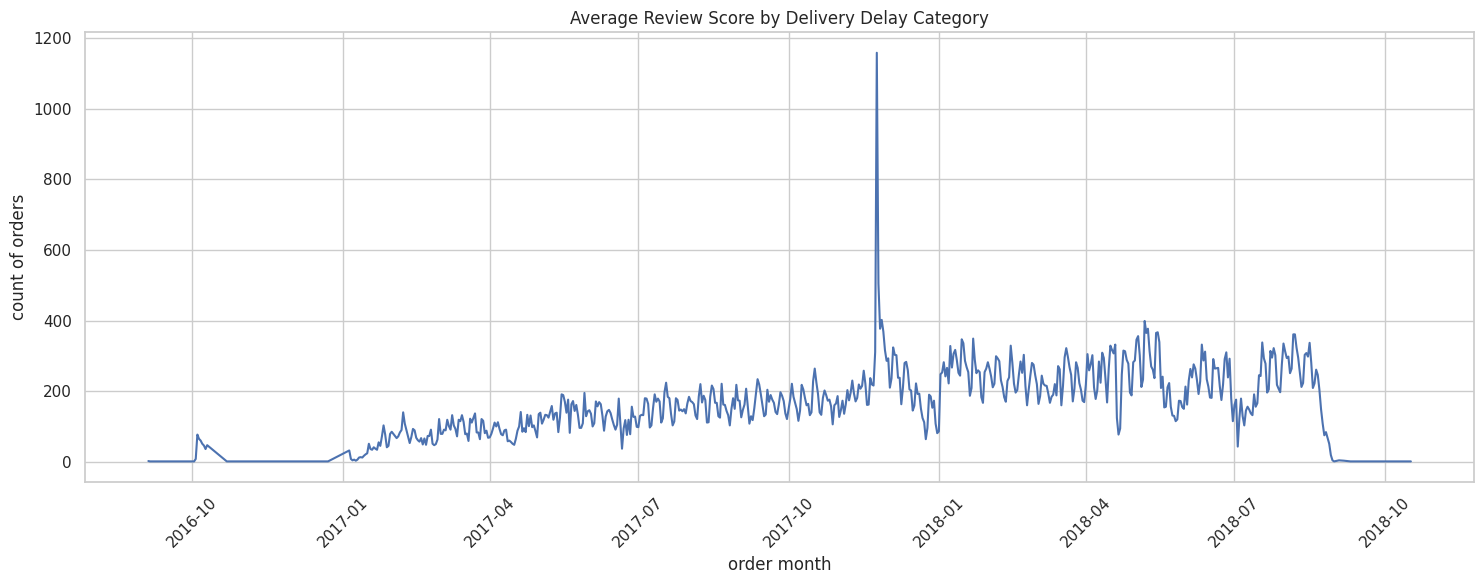

In [134]:
fig = plt.figure(figsize=(15, 6))
sns.lineplot(data=orders_daily, x="order_purchase_day", y="count")
plt.title('Average Review Score by Delivery Delay Category')
plt.ylabel('count of orders')
plt.xlabel('order month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [135]:
plt.show()

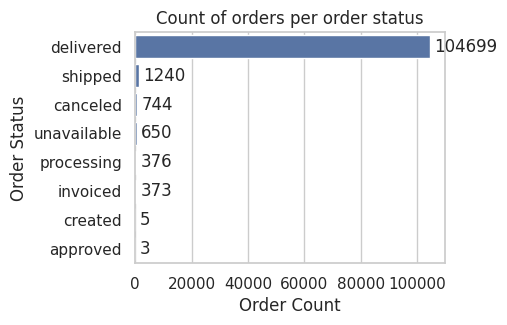

In [136]:
fig = plt.figure(figsize=(4, 3))
ax = sns.barplot(data = order_status_counts,x= 'order_count',y='order_status',orient='h')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)
plt.title('Count of orders per order status')
plt.xlabel('Order Count')
plt.ylabel('Order Status')
plt.show()

In [137]:
commerce["order_day_name"] = commerce["order_purchase_timestamp"].dt.day_name()
commerce["order_month"] = commerce["order_purchase_timestamp"].dt.month_name()
commerce["order_day_of_week"] = commerce["order_purchase_timestamp"].dt.dayofweek

weekday_counts = commerce["order_day_name"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index(name="count")

month_counts = commerce["order_month"].value_counts().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]).reset_index(name="count")

weekday_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_day_name  7 non-null      object
 1   count           7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes


In [138]:
commerce.head()

,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,shipping_deadline,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_purchase_day,order_purchase_month,order_day_name,order_month,order_day_of_week
0,14409,franca,SP,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,2017-05-16,2017-05-01,Tuesday,May,1
1,9790,sao bernardo do campo,SP,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,5.0,NaN,NaN,2018-01-30,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,2018-01-12,2018-01-01,Friday,January,4
2,8775,mogi das cruzes,SP,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,5.0,NaN,NaN,2018-03-29,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,2018-03-13,2018-03-01,Tuesday,March,1
3,13056,campinas,SP,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,2018-07-29,2018-07-01,Sunday,July,6
4,89254,jaragua do sul,SC,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,5.0,NaN,Loja responsável,2017-09-29,2017-10-01 21:52:53,1.0,debit_card,1.0,282.21,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP,32.0,282.0,2.0,4450.0,60.0,15.0,15.0,sports_leisure,2017-09-14,2017-09-01,Thursday,September,3


In [139]:
weekday_counts

,order_day_name,count
0,Monday,17411
1,Tuesday,17422
2,Wednesday,16945
3,Thursday,16355
4,Friday,15383
5,Saturday,11796
6,Sunday,12778


In [140]:
month_counts

,order_month,count
0,January,9033
1,February,8815
2,March,9949
3,April,10064
4,May,11809
5,June,10826
6,July,11102
7,August,11764
8,September,4916
9,October,5783


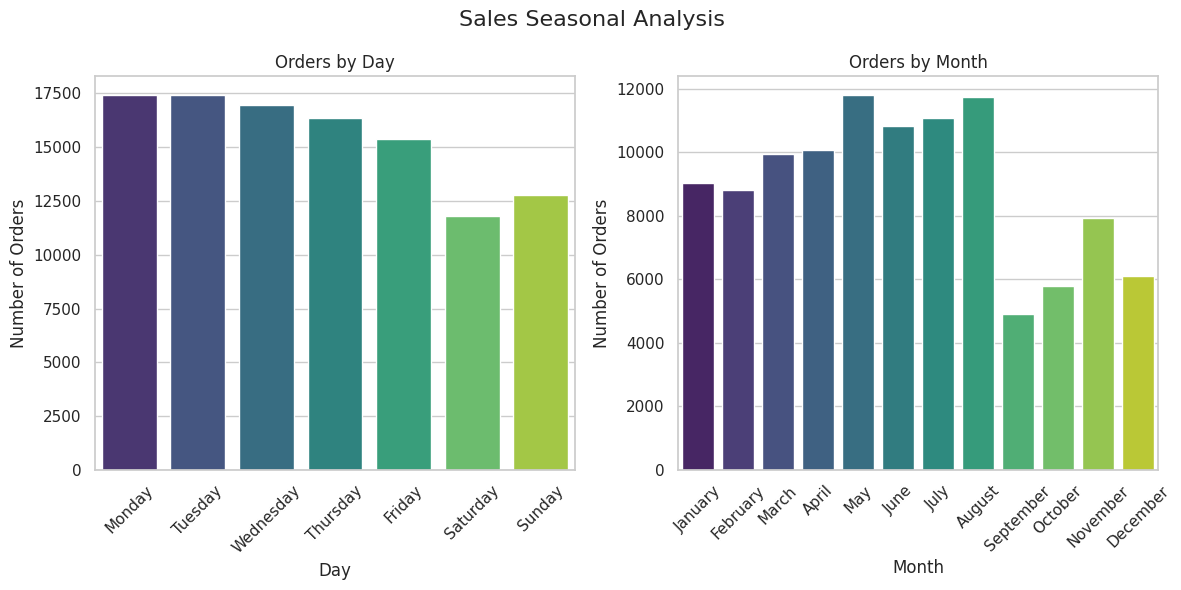

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=weekday_counts, x="order_day_name", y="count", palette='viridis',ax=axes[0])
axes[0].set_title("Orders by Day")
axes[0].set_xlabel("Day")
axes[0].set_ylabel("Number of Orders")
axes[0].tick_params(axis="x", rotation=45)

sns.barplot(data=month_counts, x="order_month", y="count",palette='viridis', ax=axes[1])
axes[1].set_title("Orders by Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Orders")
axes[1].tick_params(axis="x", rotation=45)

fig.suptitle("Sales Seasonal Analysis", fontsize=16)
plt.tight_layout()
plt.show()

In [142]:
payment_type_count= commerce.groupby('payment_type').agg(
                                    count= ('price','count'),
                                    avg_price= ('price','mean')

).reset_index()

In [143]:
payment_type_count

,payment_type,count,avg_price
0,bank_slip,20641,104.084016
1,credit_card,79262,125.263009
2,debit_card,1516,111.425376
3,voucher,5841,103.320796


In [144]:
labels= ['bank_slip','credit_card','debit_card','voucher']
colors = sns.color_palette('pastel')
explode = [0, 0.1, 0, 0]

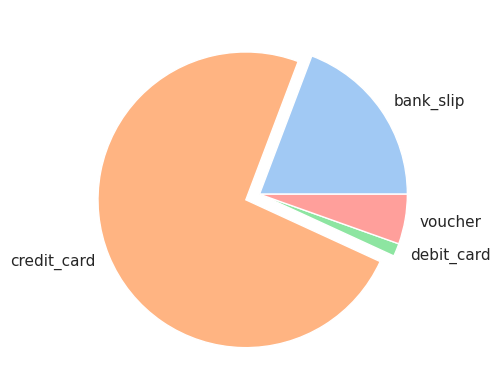

In [145]:
plt.pie(data= payment_type_count,x= 'count',labels=labels,colors=colors,explode=explode)
plt.show()

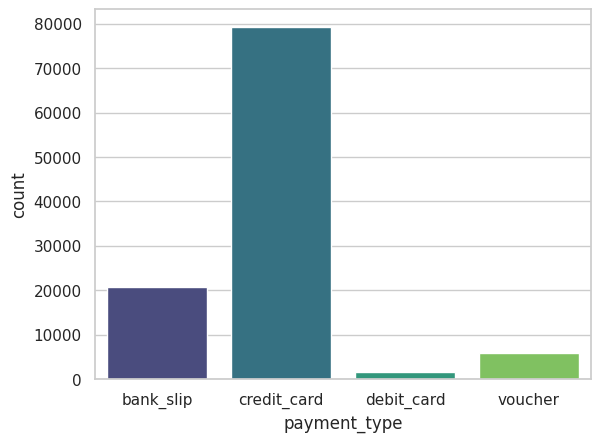

In [146]:
sns.barplot(data= payment_type_count,x='payment_type',y='count',palette= 'viridis')
plt.show()

In [147]:
commerce.head(5)

,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,shipping_deadline,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_purchase_day,order_purchase_month,order_day_name,order_month,order_day_of_week
0,14409,franca,SP,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,2017-05-16,2017-05-01,Tuesday,May,1
1,9790,sao bernardo do campo,SP,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,5.0,NaN,NaN,2018-01-30,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,2018-01-12,2018-01-01,Friday,January,4
2,8775,mogi das cruzes,SP,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,5.0,NaN,NaN,2018-03-29,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,2018-03-13,2018-03-01,Tuesday,March,1
3,13056,campinas,SP,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,2018-07-29,2018-07-01,Sunday,July,6
4,89254,jaragua do sul,SC,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04,5.0,NaN,Loja responsável,2017-09-29,2017-10-01 21:52:53,1.0,debit_card,1.0,282.21,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP,32.0,282.0,2.0,4450.0,60.0,15.0,15.0,sports_leisure,2017-09-14,2017-09-01,Thursday,September,3


In [148]:
sales_by_product= commerce.groupby('product_category_name_english')['price'].sum().reset_index().sort_values(by='price',ascending=False).reset_index().head(8)

In [149]:
sales_by_product

,index,product_category_name_english,price
0,43,health_beauty,1161028.06
1,72,watches_gifts,1128069.70
2,7,bed_bath_table,988509.66
3,67,sports_leisure,927628.05
4,15,computers_accessories,858207.62
5,39,furniture_decor,687807.18
6,20,cool_stuff,607032.73
7,49,housewares,606425.50


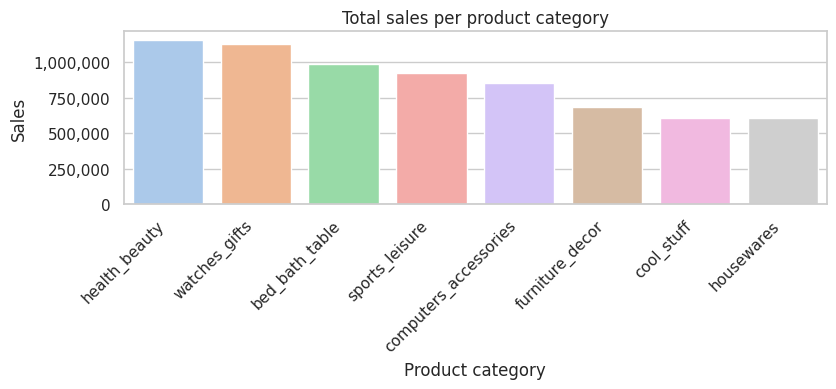

In [150]:
plt.figure(figsize=(8, 4)) # Adjust figure size
ax= sns.barplot(data= sales_by_product,x='product_category_name_english',y='price',palette='pastel')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.tight_layout() # Adjust layout to prevent labels from being cut off
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # Format y-axis labels
plt.title('Total sales per product category')
plt.xlabel('Product category')
plt.ylabel('Sales')
plt.show()

In [151]:
orders_per_country= commerce.groupby('customer_city').agg(

                                      count= ('customer_city','count'),
                                      avg_order_price= ('price','mean')
).sort_values(by='count',ascending=False).head(5)

In [152]:
orders_per_country

,count,avg_order_price
customer_city,,
sao paulo,17429,107.238233
rio de janeiro,7274,124.925282
belo horizonte,3034,111.699614
brasilia,2264,128.589368
curitiba,1710,120.255862


In [153]:
orders_by_city = commerce.groupby('customer_city').size().reset_index(name='total_orders').sort_values(by='total_orders',ascending=False)
display(orders_by_city.head())

,customer_city,total_orders
3476,sao paulo,17429
3045,rio de janeiro,7274
436,belo horizonte,3034
539,brasilia,2264
1112,curitiba,1710


In [154]:
orders_by_city= orders_by_city.reset_index(drop=True).head(8)

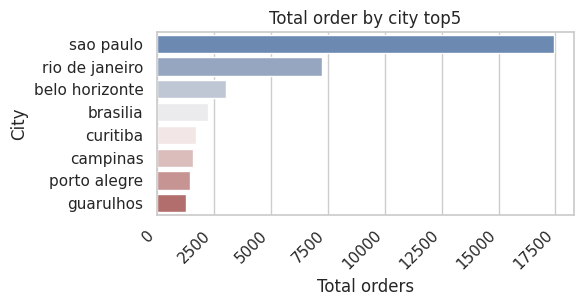

In [155]:
plt.figure(figsize=(6,3))
ax= sns.barplot(data=orders_by_city,x= 'total_orders',y='customer_city',palette='vlag')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Total order by city top5')
plt.xlabel('Total orders')
plt.ylabel('City')
plt.show()

In [156]:
orders_by_city

,customer_city,total_orders
0,sao paulo,17429
1,rio de janeiro,7274
2,belo horizonte,3034
3,brasilia,2264
4,curitiba,1710
5,campinas,1574
6,porto alegre,1457
7,guarulhos,1300


In [157]:
commerce.head(2)

,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,shipping_deadline,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_purchase_day,order_purchase_month,order_day_name,order_month,order_day_of_week
0,14409,franca,SP,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,2017-05-16,2017-05-01,Tuesday,May,1
1,9790,sao bernardo do campo,SP,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,5.0,NaN,NaN,2018-01-30,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,2018-01-12,2018-01-01,Friday,January,4


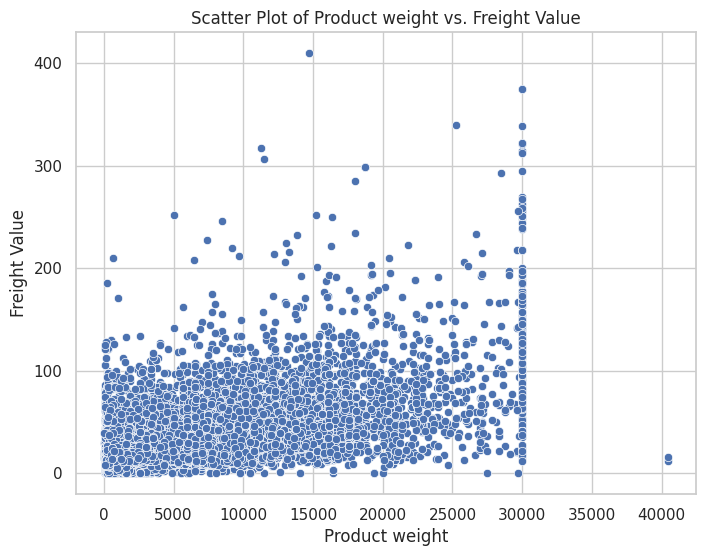

In [158]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=commerce, x='product_weight_g', y='freight_value')
plt.title('Scatter Plot of Product weight vs. Freight Value')
plt.xlabel('Product weight')
plt.ylabel('Freight Value')
plt.show()

In [159]:
import plotly.express as px
# Create donut chart
plt.figure(figsize=(5,5))
fig = px.pie(payment_type_count,values='count', names='payment_type', hole=0.4, title='Payment Distribution')
fig.update_layout(width=500, height=300)
fig.show()

<Figure size 500x500 with 0 Axes>

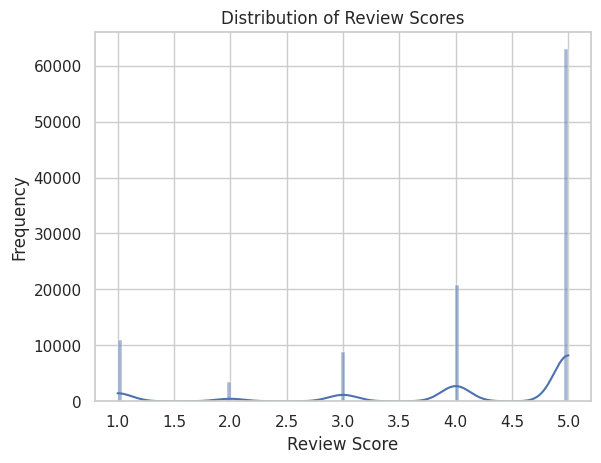

In [160]:
sns.histplot(data= commerce,x='review_score',kde=True,palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

In [161]:
commerce.select_dtypes(include=np.number).corr()

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,price,freight_value,seller_zip_code_prefix,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_day_of_week
customer_zip_code_prefix,1.000000,-0.012329,-0.021997,0.055212,0.055831,0.045580,0.227348,0.077081,0.015306,0.027774,0.021002,0.005555,0.005310,0.012791,-0.008912,0.001346
review_score,-0.012329,1.000000,-0.012353,-0.040035,-0.089348,0.005252,-0.024121,0.019057,-0.004855,0.011668,0.024319,-0.025771,-0.017970,-0.026350,-0.011479,-0.012957
payment_sequential,-0.021997,-0.012353,1.000000,-0.086755,-0.064497,0.005572,0.023736,0.015678,-0.006593,0.011815,-0.012136,0.041718,0.051080,0.024042,0.030044,-0.002563
payment_installments,0.055212,-0.040035,-0.086755,1.000000,0.270025,0.277617,0.183035,0.038335,0.020344,0.036535,-0.000657,0.180170,0.117145,0.123696,0.138837,0.027654
payment_value,0.055831,-0.089348,-0.064497,0.270025,1.000000,0.729160,0.365501,0.067882,0.000162,0.154489,0.003711,0.296955,0.134935,0.214724,0.144659,-0.006321
price,0.045580,0.005252,0.005572,0.277617,0.729160,1.000000,0.413711,0.089604,0.016346,0.202558,0.048440,0.338869,0.144632,0.223165,0.172448,0.002451
freight_value,0.227348,-0.024121,0.023736,0.183035,0.365501,0.413711,1.000000,0.153618,0.020930,0.099577,0.020538,0.610093,0.307845,0.392463,0.319891,0.007635
seller_zip_code_prefix,0.077081,0.019057,0.015678,0.038335,0.067882,0.089604,0.153618,1.000000,-0.034688,0.064143,-0.040220,0.012965,0.033354,0.016266,-0.017658,0.000420
product_name_length,0.015306,-0.004855,-0.006593,0.020344,0.000162,0.016346,0.020930,-0.034688,1.000000,0.090659,0.142716,0.020157,0.057855,-0.031158,0.061421,-0.003345
product_description_length,0.027774,0.011668,0.011815,0.036535,0.154489,0.202558,0.099577,0.064143,0.090659,1.000000,0.114518,0.065766,0.008730,0.074854,-0.066600,-0.003564


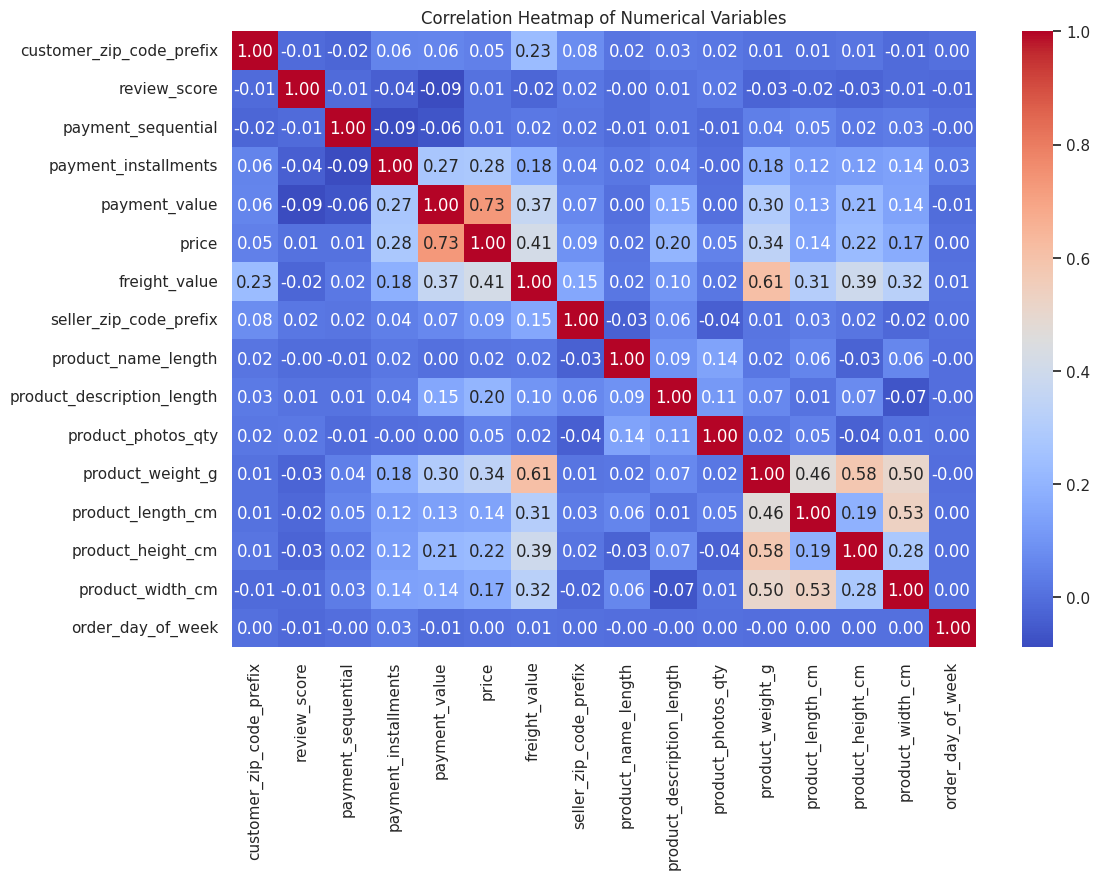

In [162]:
plt.figure(figsize=(12, 8))
sns.heatmap(commerce.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()